### Trains a CNN using pytorch on MNIST dataset

References: https://pytorch.org/tutorials/beginner/nn_tutorial.html, 
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py,
https://github.com/pytorch/examples/blob/master/mnist/main.py

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import pickle

In [2]:
save_dir = Path("pretrained")
os.makedirs(save_dir, exist_ok=True)

path_to_mnist = Path('dataset')

device = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")


In [3]:
batch_size = 32
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(path_to_mnist, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=True, num_workers=1)

valset = torchvision.datasets.MNIST(path_to_mnist, download=True, 
                                    train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

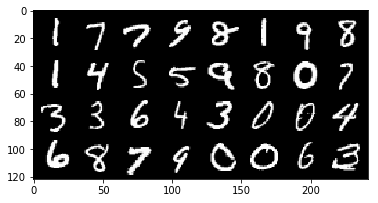

tensor([1, 7, 7, 9, 8, 1, 9, 8, 1, 4, 5, 5, 9, 8, 0, 7, 3, 3, 6, 4, 3, 0, 0, 4,
        6, 8, 7, 9, 0, 0, 6, 3])


In [5]:
def show(img):
    img = np.transpose(img, (1,2,0))
    plt.imshow(img, cmap="gray")
    plt.show()
    
show(torchvision.utils.make_grid(images))
print(labels)

In [6]:
class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)
        
    def forward(self, xb):
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

In [7]:
model = MNIST_CNN()
model.to(device)


MNIST_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [9]:
for epoch in range(30): 

    train_loss = 0
    model.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_size
    print('Epoch: {}, Train Loss: {:.4f}'.format(epoch, train_loss/len(trainset)))

    val_loss = 0
    val_acc = 0
    model.eval()

    with torch.no_grad():
        for i, data in enumerate(valloader):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item() * batch_size * 2
            _, predicted = torch.max(outputs.data, 1)
            val_acc += (predicted == labels).sum().item()
    print('Epoch: {}, Val Loss: {:.4f}, Val Acc: {:.4f}%'.format(epoch, val_loss/len(valset), val_acc/len(valset)*100))

print('Finished Training')

Epoch: 0, Train Loss: 2.2698
Epoch: 0, Val Loss: 4.2767, Val Acc: 28.6100%
Epoch: 1, Train Loss: 1.5638
Epoch: 1, Val Loss: 2.5074, Val Acc: 59.7900%
Epoch: 2, Train Loss: 1.0278
Epoch: 2, Val Loss: 1.6604, Val Acc: 73.6200%
Epoch: 3, Train Loss: 0.7572
Epoch: 3, Val Loss: 1.3406, Val Acc: 79.5200%
Epoch: 4, Train Loss: 0.6439
Epoch: 4, Val Loss: 1.1925, Val Acc: 81.5400%
Epoch: 5, Train Loss: 0.5675
Epoch: 5, Val Loss: 1.0278, Val Acc: 84.1200%
Epoch: 6, Train Loss: 0.5052
Epoch: 6, Val Loss: 0.8956, Val Acc: 86.8200%
Epoch: 7, Train Loss: 0.4581
Epoch: 7, Val Loss: 0.8103, Val Acc: 88.0100%
Epoch: 8, Train Loss: 0.4222
Epoch: 8, Val Loss: 0.8439, Val Acc: 87.0700%
Epoch: 9, Train Loss: 0.3941
Epoch: 9, Val Loss: 0.7319, Val Acc: 89.1600%
Epoch: 10, Train Loss: 0.3747
Epoch: 10, Val Loss: 0.6930, Val Acc: 89.9500%
Epoch: 11, Train Loss: 0.3577
Epoch: 11, Val Loss: 0.6975, Val Acc: 89.7600%
Epoch: 12, Train Loss: 0.3447
Epoch: 12, Val Loss: 0.6250, Val Acc: 90.7600%
Epoch: 13, Train Lo

In [10]:
torch.save(model.state_dict(), save_dir / "pretrained_MNIST_CNN.pth")

# Extract GAP layer outputs

In [ ]:
model.eval()

In [ ]:
x_extract = {'train': np.empty((len(trainset), 10)), 'val': np.empty((len(valset), 10))} 

In [ ]:
y_extract = {'train': np.empty(len(trainset)), 'val': np.empty(len(valset))} 

In [ ]:
dataloader = {'train': trainloader, 'val': valloader}

In [ ]:
with torch.no_grad():
    for phase in ('train', 'val'):
        for i, (inputs, labels) in enumerate(dataloader[phase]):
            outputs = model(inputs.to(device))
            x_extract[phase][(i*batch_size):(i*batch_size)+inputs.size(0)] = outputs.cpu().numpy()
            y_extract[phase][(i*batch_size):(i*batch_size)+inputs.size(0)] = labels.cpu().numpy()

In [ ]:
with open(save_dir / 'x_extract.pkl', 'wb') as f_x, open(save_dir / 'y_extract.pkl', 'wb') as f_y:
    pickle.dump(x_extract, f_x)
    pickle.dump(y_extract, f_y)